In [18]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

In [6]:
# Path to the zip file
zip_file_path = '.\Dataset-zip\PRAICP-1004-RainfallTS.zip'

# Path to the dataset folder
dataset_folder = '.\Dataset-org'

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Data extracted to {dataset_folder}")

Data extracted to .\Dataset-org


In [14]:
# Load datasets
df_highest_monthly_total = pd.read_csv('Dataset-org/Data/rainfall-monthly-highest-daily-total.csv')
df_rainy_days = pd.read_csv('Dataset-org/Data/rainfall-monthly-number-of-rain-days.csv')
df_total_rainfall = pd.read_csv('Dataset-org/Data/rainfall-monthly-total.csv')

# Merge datasets on 'month'
df_combined = pd.merge(df_highest_monthly_total, df_rainy_days, on='month')
df_combined = pd.merge(df_combined, df_total_rainfall, on='month')

# Convert 'month' column to datetime if not already
df_combined['month'] = pd.to_datetime(df_combined['month'], format='%Y-%m')

# Format the 'month' column to display only Year and Month (YYYY-MM) as a string
df_combined['month'] = df_combined['month'].dt.strftime('%Y-%m')

# Display the combined dataframe to verify the result
print(df_combined)

       month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0    1982-01                       36.5                10           107.1
1    1982-02                        9.4                 5            27.8
2    1982-03                       61.7                11           160.8
3    1982-04                       45.1                14           157.0
4    1982-05                       33.0                10           102.2
..       ...                        ...               ...             ...
457  2020-02                       23.8                 8            65.0
458  2020-03                       47.4                 8           108.8
459  2020-04                       51.8                12           188.0
460  2020-05                       53.8                16           255.6
461  2020-06                       41.0                21           233.8

[462 rows x 4 columns]


In [16]:
# combined dataset saves in csv 
df_combined.to_csv('Dataset-org/Data/df_combined.csv',index=False)

In [2]:
# read combined dataset
org_df=pd.read_csv('Dataset-org/Data/df_combined.csv')
org_df

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
0,1982-01,36.5,10,107.1
1,1982-02,9.4,5,27.8
2,1982-03,61.7,11,160.8
3,1982-04,45.1,14,157.0
4,1982-05,33.0,10,102.2
...,...,...,...,...
457,2020-02,23.8,8,65.0
458,2020-03,47.4,8,108.8
459,2020-04,51.8,12,188.0
460,2020-05,53.8,16,255.6


In [6]:
# Check for missing values
print('null values')
print('------------------------------')
print(org_df.isnull().sum())
print('------------------------------')
print()

# Descriptive statistics
print('Descriptive statistics')
print('------------------------------------------------------------------')
print(org_df.describe())
print('------------------------------------------------------------------')
print()

# Check the time range of the data
print('month range')
print('---------------')
print(org_df['month'].min(), org_df['month'].max())
print('---------------')

null values
------------------------------
month                        0
maximum_rainfall_in_a_day    0
no_of_rainy_days             0
total_rainfall               0
dtype: int64
------------------------------

Descriptive statistics
------------------------------------------------------------------
       maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
count                 462.000000        462.000000      462.000000
mean                   52.358225         13.958874      176.236580
std                    35.685122          4.947494      113.296793
min                     0.200000          1.000000        0.200000
25%                    30.625000         11.000000       89.025000
50%                    43.450000         14.000000      158.450000
75%                    63.150000         18.000000      237.950000
max                   216.200000         27.000000      765.900000
------------------------------------------------------------------

month range
---------------

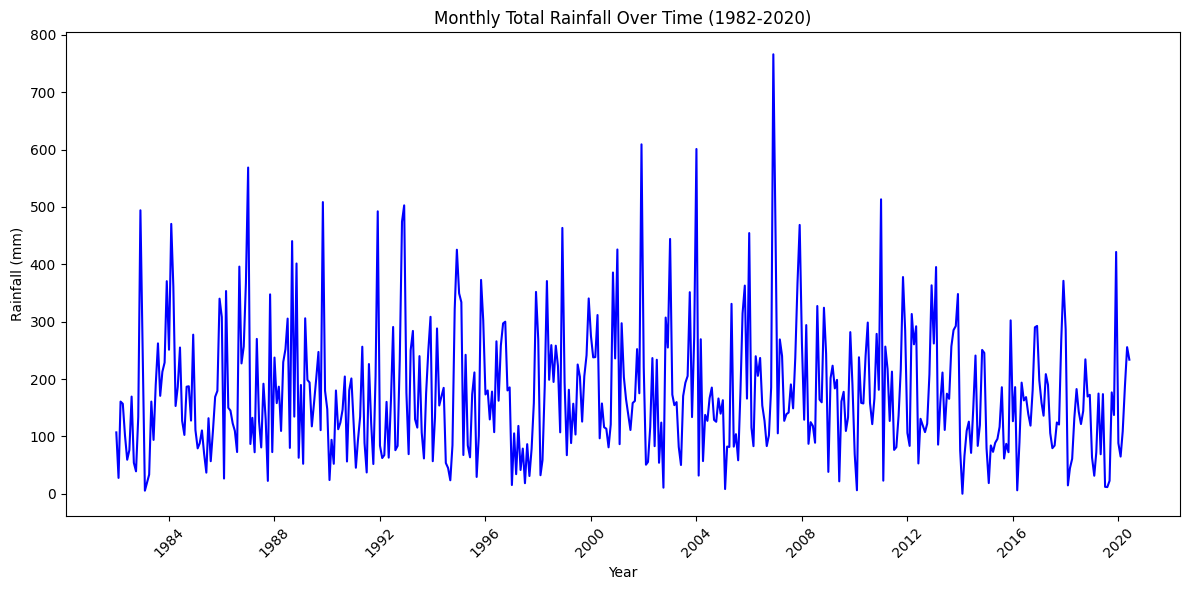

In [15]:
# Convert the 'month' column to a datetime object (if not already done)
org_df['month'] = pd.to_datetime(org_df['month'])

# Set up the plot size to fit horizontally
plt.figure(figsize=(12, 6))  

# Plot the data
plt.plot(org_df['month'], org_df['total_rainfall'], label='Total Rainfall', color='blue')
plt.title('Monthly Total Rainfall Over Time ({}-{})'.format(org_df['month'].min().year, org_df['month'].max().year))
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

# Format the x-axis to show labels every 4 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))  # Locator for every 4 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format labels to show the year only

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout so labels do not overlap and fit into the plot area
plt.tight_layout()

# Display the plot
plt.show()

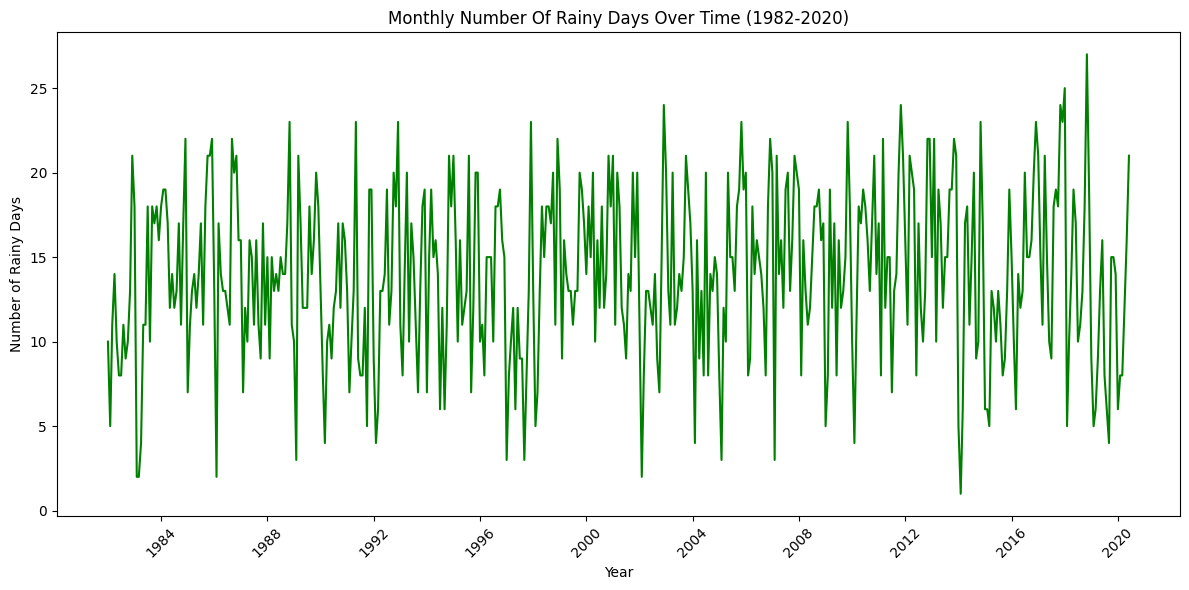

In [14]:
# Set up the plot size to fit horizontally
plt.figure(figsize=(12, 6))  

# Plot the data
plt.plot(org_df['month'], org_df['no_of_rainy_days'], label='no_of_rainy_days', color='green')
plt.title('Monthly Number Of Rainy Days Over Time ({}-{})'.format(org_df['month'].min().year, org_df['month'].max().year))
plt.xlabel('Year')
plt.ylabel('Number of Rainy Days')

# Format the x-axis to show labels every 4 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))  # Locator for every 4 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format labels to show the year only

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout so labels do not overlap and fit into the plot area
plt.tight_layout()

# Display the plot
plt.show()

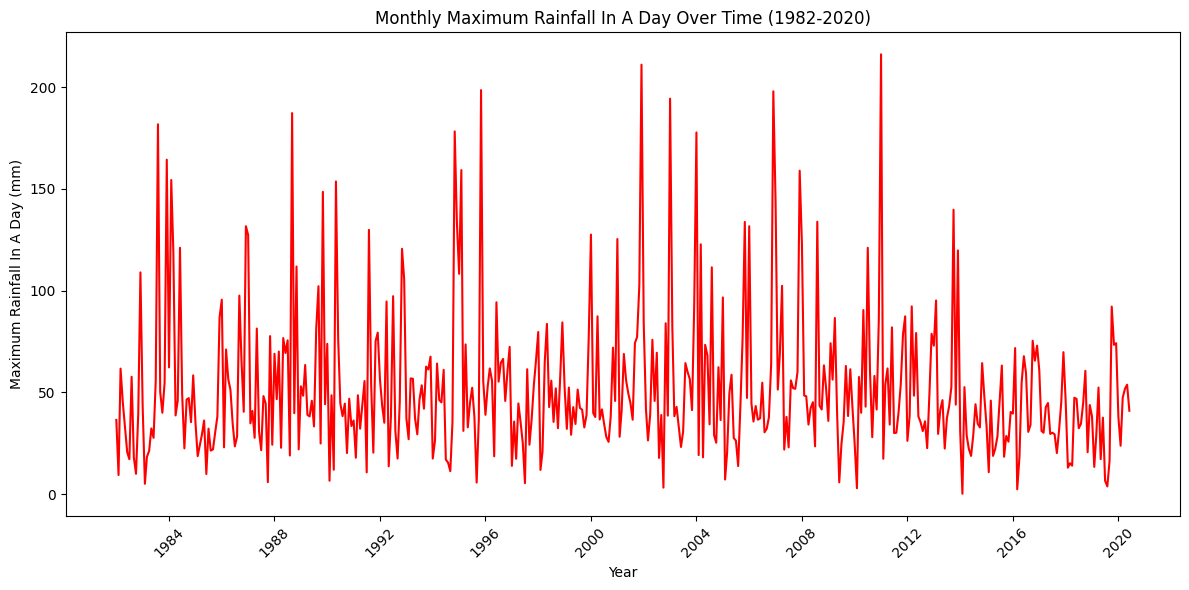

In [16]:
# Set up the plot size to fit horizontally
plt.figure(figsize=(12, 6))  

# Plot the data
plt.plot(org_df['month'], org_df['maximum_rainfall_in_a_day'], label='maximum_rainfall_in_a_day ', color='red')
plt.title('Monthly Maximum Rainfall In A Day Over Time ({}-{})'.format(org_df['month'].min().year, org_df['month'].max().year))
plt.xlabel('Year')
plt.ylabel('Maximum Rainfall In A Day (mm)')

# Format the x-axis to show labels every 4 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))  # Locator for every 4 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format labels to show the year only

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout so labels do not overlap and fit into the plot area
plt.tight_layout()

# Display the plot
plt.show()

In [3]:
# Ensure 'month' column is datetime and set as index
org_df['month'] = pd.to_datetime(org_df['month'])
org_df.set_index('month', inplace=True)


In [4]:
# Function to plot ACF
def plot_acf_plot(df, column_name):
    """
    Plots both ACF for the specified column in the dataframe.

    Parameters:
    - df: DataFrame containing the data
    - column_name: The name of the column to plot ACF for
    - lags: Number of lags to display in the ACF plot (default is 40)
    """
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis manually
    
    plot_acf(df[column_name], alpha=0.05, ax=ax)
    
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    plt.show()

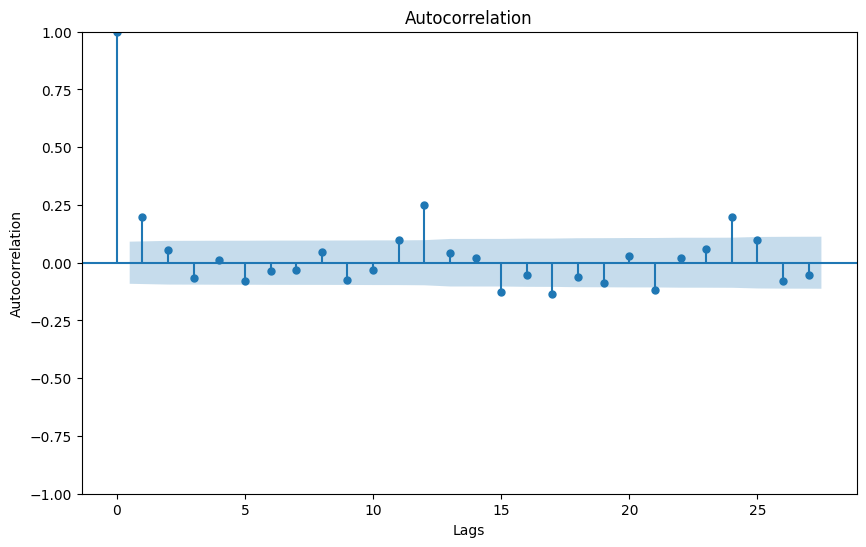

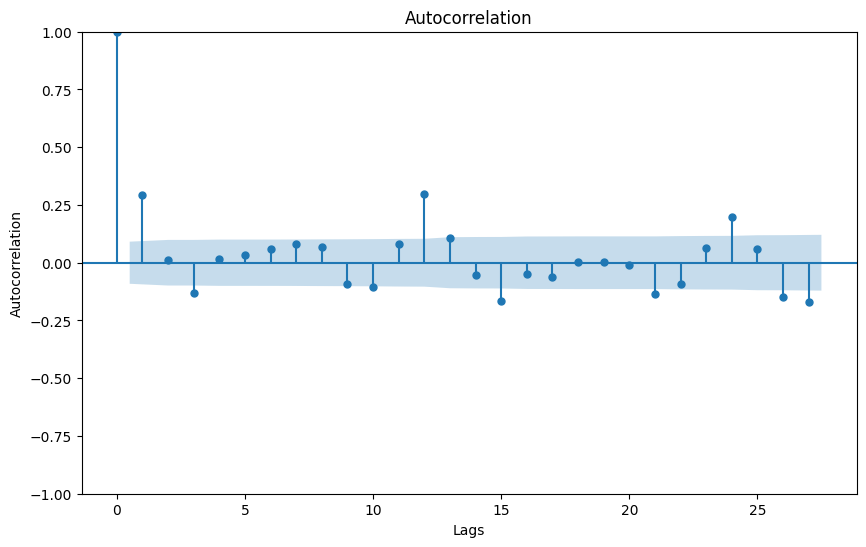

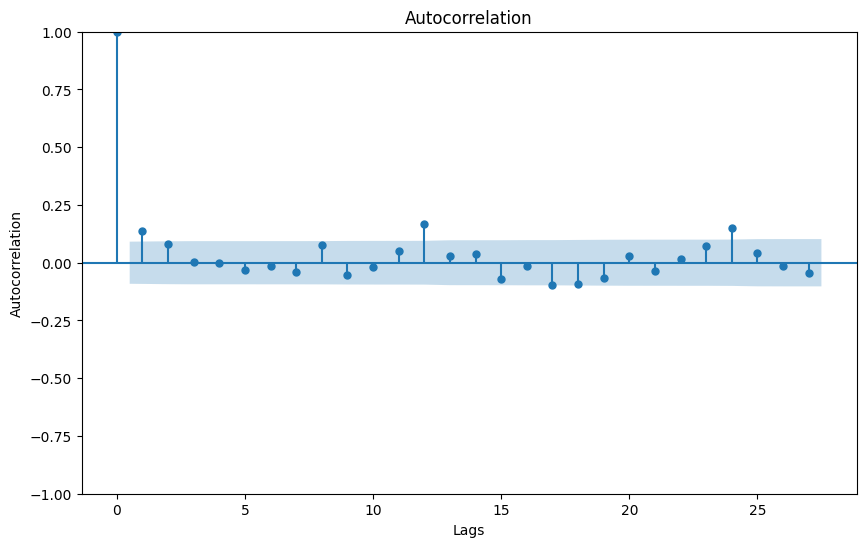

In [163]:
plot_acf_plot(org_df, 'total_rainfall')
plot_acf_plot(org_df, 'no_of_rainy_days')
plot_acf_plot(org_df, 'maximum_rainfall_in_a_day')

In [5]:
org_df=org_df.diff(periods=3).dropna()
org_df

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
month,,,
1982-04-01,8.6,4.0,49.9
1982-05-01,23.6,5.0,74.4
1982-06-01,-41.1,-3.0,-101.3
1982-07-01,-27.9,-6.0,-80.7
1982-08-01,24.7,1.0,67.3
...,...,...,...
2020-02-01,-49.6,-7.0,-72.4
2020-03-01,-26.8,-6.0,-312.7
2020-04-01,13.8,6.0,99.6


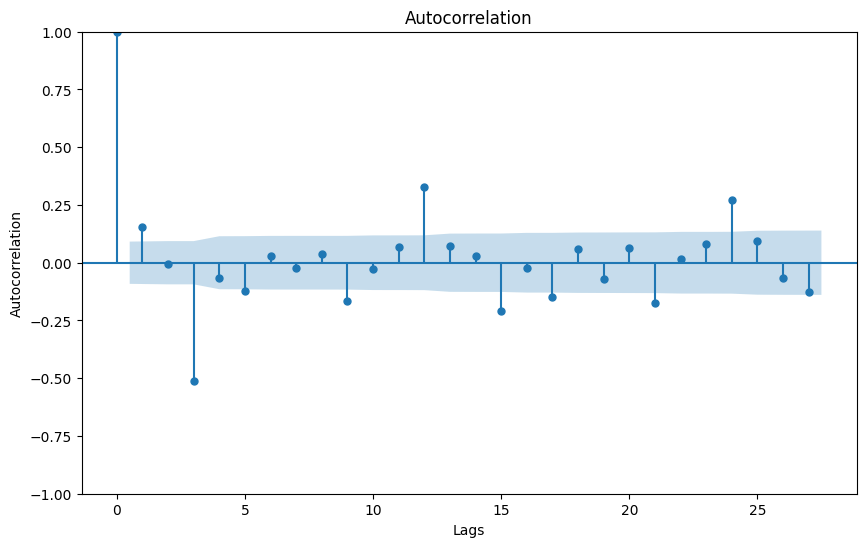

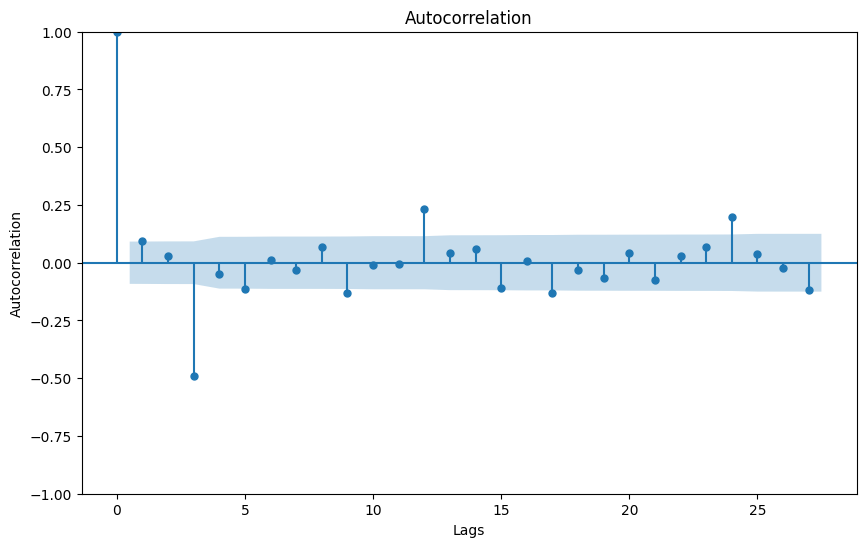

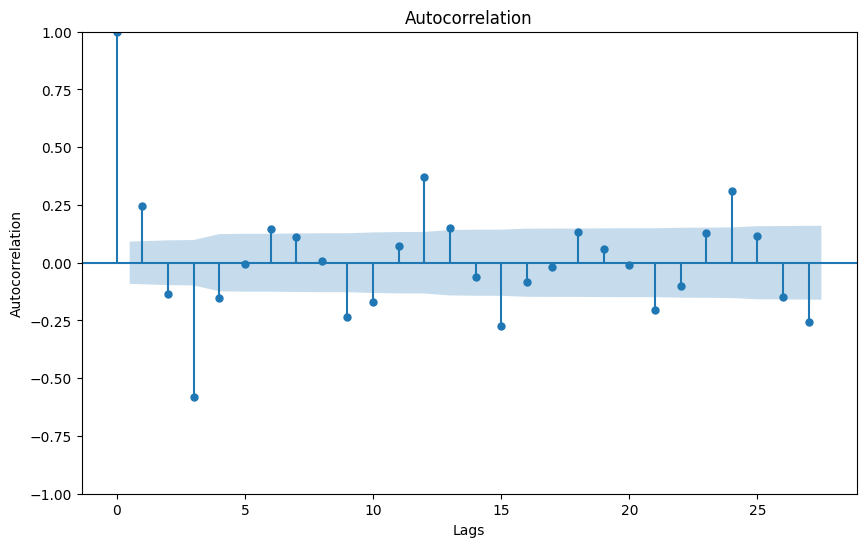

In [6]:
plot_acf_plot(org_df, 'total_rainfall',)
plot_acf_plot(org_df, 'maximum_rainfall_in_a_day')
plot_acf_plot(org_df, 'no_of_rainy_days')

In [4]:
# type of original dataset
type(org_df)

pandas.core.frame.DataFrame

In [166]:
# shape of original datset
org_df.shape

(459, 3)

In [169]:
#checking for training and testing split
459/100*75

344.25

In [7]:
# creating training and testing datset 
train=org_df[:344]
test=org_df[344:]

In [8]:
# train and test shape
print(train.shape)
print(test.shape)

(344, 3)
(115, 3)


In [172]:
# first 5 rows of train set
train.head()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
month,,,
1982-04-01,8.6,4.0,49.9
1982-05-01,23.6,5.0,74.4
1982-06-01,-41.1,-3.0,-101.3
1982-07-01,-27.9,-6.0,-80.7
1982-08-01,24.7,1.0,67.3


In [173]:
# test set first 5 rows
test.head()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
month,,,
2010-12-01,57.8,1.0,59.9
2011-01-01,158.1,0.0,347.0
2011-02-01,-24.2,-13.0,-255.8
2011-03-01,-31.8,8.0,75.2
2011-04-01,-154.4,-5.0,-295.4


In [176]:
def no_lags(column_name):
    mod = ar_select_order(train[column_name],maxlag=15,glob=True)
    return mod.ar_lags

# ar_select_order: selects the best number of lags
# maxlag: previous lags
# glob: try for all diff combinations

In [9]:
# setting frequency of datset as month
org_df.index = pd.to_datetime(org_df.index)
org_df = org_df.asfreq('MS')  # Use 'M' for month-end frequency if needed


In [10]:
# checking indexes of train and test set
print(train.index)
print(test.index)


DatetimeIndex(['1982-04-01', '1982-05-01', '1982-06-01', '1982-07-01',
               '1982-08-01', '1982-09-01', '1982-10-01', '1982-11-01',
               '1982-12-01', '1983-01-01',
               ...
               '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01',
               '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01',
               '2010-10-01', '2010-11-01'],
              dtype='datetime64[ns]', name='month', length=344, freq=None)
DatetimeIndex(['2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='month', length=115, freq=None)


In [11]:
# setting frequency as month for train and test set
train = train.asfreq('MS')
test = test.asfreq('MS')

In [181]:
# column1 lag aquired
column1_lags=no_lags('maximum_rainfall_in_a_day')
column1_lags

[2, 3, 6, 9]

In [182]:
# column2 lag aquired 
column2_lags=no_lags('no_of_rainy_days')
column2_lags

[1, 3, 4, 6, 7, 9]

In [183]:
# column3 lag aquired 
column3_lags=no_lags('total_rainfall')
column3_lags

[2, 3, 6, 9]

In [184]:
# checking columns of train set
train.columns

Index(['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall'], dtype='object')

In [185]:
# function for AutoReg model training for different columns and making prediction also
def AR_model(column_name,lags):
    ar_model=AutoReg(train[column_name],lags=lags) 
    ar_model_fit=ar_model.fit() 
    prediction=ar_model_fit.predict(start=344,end=459)
    print(prediction)
    plt.plot(test[column_name])
    plt.plot(prediction,color='green') 
    plt.title('test vs prediction')


2010-12-01    7.772516
2011-01-01   -7.107031
2011-02-01   -5.299325
2011-03-01    8.753749
2011-04-01    6.524228
                ...   
2020-03-01    0.110082
2020-04-01    0.103548
2020-05-01    0.110734
2020-06-01    0.103573
2020-07-01    0.109184
Freq: MS, Length: 116, dtype: float64


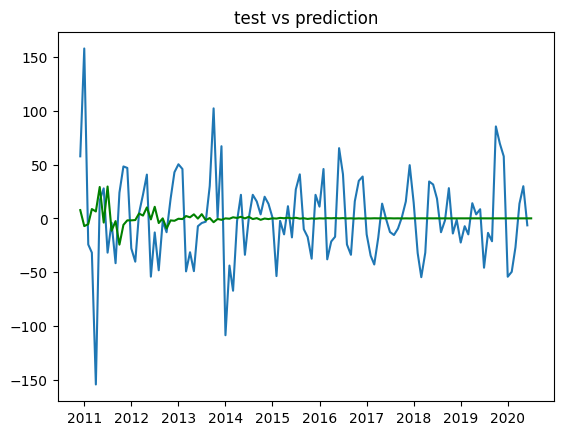

In [186]:
# first column training and prediction
AR_model('maximum_rainfall_in_a_day',column1_lags)

2010-12-01    6.220190
2011-01-01   -1.283394
2011-02-01   -9.988255
2011-03-01   -6.503087
2011-04-01    0.834132
                ...   
2020-03-01    0.054420
2020-04-01    0.048010
2020-05-01    0.035539
2020-06-01    0.029196
2020-07-01    0.033553
Freq: MS, Length: 116, dtype: float64


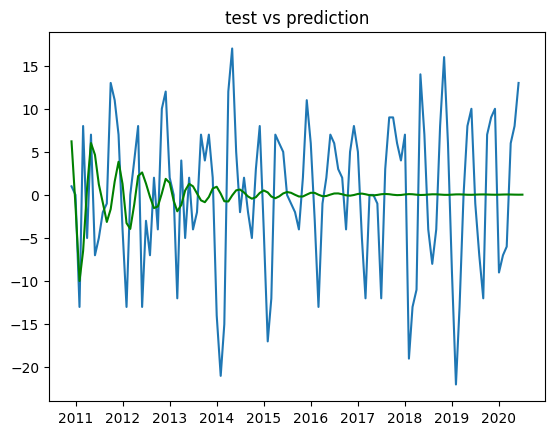

In [187]:
# second column training and prediction
AR_model('no_of_rainy_days',column2_lags)

2010-12-01     59.815732
2011-01-01    -12.224852
2011-02-01   -164.762641
2011-03-01     24.340206
2011-04-01      9.924019
                 ...    
2020-03-01      0.399370
2020-04-01      0.283162
2020-05-01      0.398187
2020-06-01      0.301555
2020-07-01      0.405177
Freq: MS, Length: 116, dtype: float64


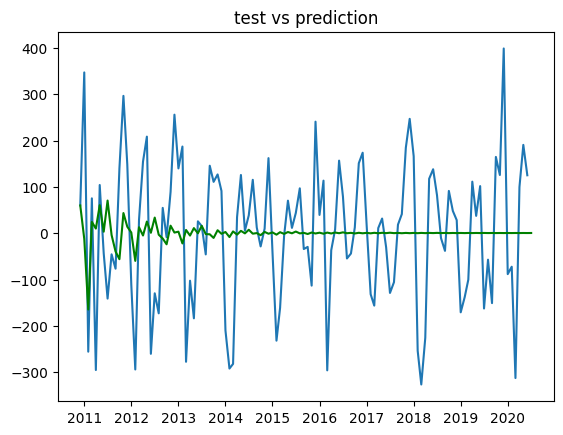

In [188]:
# third column training and prediction
AR_model('total_rainfall',column3_lags)

#### conclusion of AR model
- AutoReg model is not good when i look into prediction vs test it shows model is good in beginning but in the end it's not good at prediction
- there may be some non-stationary data is there so try ARIMA model then 
- there is also some seasonality and trend in dataset so model is not good 
 

In [37]:
# original dataset
org_df=pd.read_csv('Dataset-org\Data\df_combined.csv')
org_df

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
0,1982-01,36.5,10,107.1
1,1982-02,9.4,5,27.8
2,1982-03,61.7,11,160.8
3,1982-04,45.1,14,157.0
4,1982-05,33.0,10,102.2
...,...,...,...,...
457,2020-02,23.8,8,65.0
458,2020-03,47.4,8,108.8
459,2020-04,51.8,12,188.0
460,2020-05,53.8,16,255.6


In [38]:
# checking for test and train split
462/100*80

369.6

In [40]:
# train and test split
train = org_df[:370]
test = org_df[370:]

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
0,1982-01,36.5,10,107.1
1,1982-02,9.4,5,27.8
2,1982-03,61.7,11,160.8
3,1982-04,45.1,14,157.0
4,1982-05,33.0,10,102.2
...,...,...,...,...
365,2012-06,38.2,8,53.0
366,2012-07,35.4,17,130.8
367,2012-08,31.0,12,119.0
368,2012-09,35.8,10,107.6


In [43]:
# setting indexes
train=train.set_index('month')
test=test.set_index('month')

In [46]:
# setting frequencies
train=train.asfreq('MS')
test=test.asfreq('MS')
print(train.index)
print(test.index)

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01'],
              dtype='datetime64[ns]', name='month', length=370, freq='MS')
DatetimeIndex(['2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-